### Imports

In [497]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import skew
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics.pairwise import cosine_similarity

### EDA

In [498]:
df=pd.read_csv("../data/spotify_dataset.csv")

In [499]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

#### Check missing values

In [501]:
print(df.isna().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [502]:
summary_stats = df.describe()
print(summary_stats)

          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

In [503]:
df= df.drop(columns='Unnamed: 0', errors="ignore")

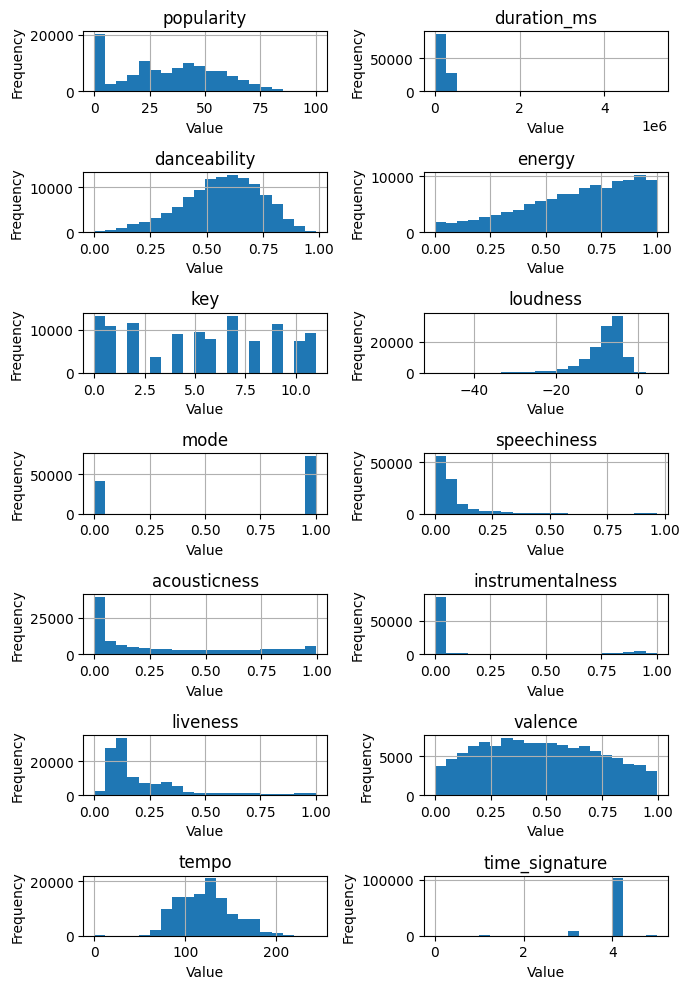

In [504]:
numerical_columns = df.select_dtypes(include='number').columns
num_rows = (len(numerical_columns) + 1) // 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(7, 10))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    df[column].hist(ax=ax, bins=20)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
for i in range(len(numerical_columns), num_rows * num_cols):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

#### Standardize the numerical features


In [505]:
scaler = StandardScaler()
numerical_columns_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=['number'])), columns=df.select_dtypes(include=['number']).columns)

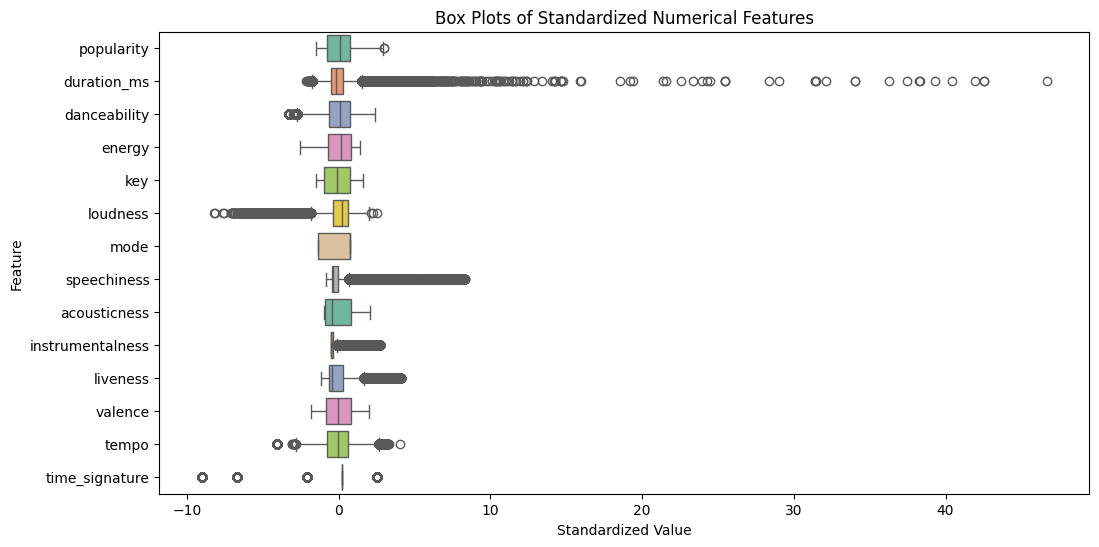

In [506]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_columns_scaled, orient='h', palette='Set2')
plt.title('Box Plots of Standardized Numerical Features')
plt.xlabel('Standardized Value')
plt.ylabel('Feature')
plt.show()

#### Check skewness

In [507]:
skewness = df.select_dtypes(include=['number']).apply(skew)
print(skewness)

popularity           0.046402
duration_ms         11.195034
danceability        -0.399491
energy              -0.596994
key                 -0.008500
loudness            -2.006516
mode                -0.572293
speechiness          4.647455
acousticness         0.727285
instrumentalness     1.734383
liveness             2.105710
valence              0.115077
tempo                0.232292
time_signature      -4.098263
dtype: float64


#### Correlation Matrix

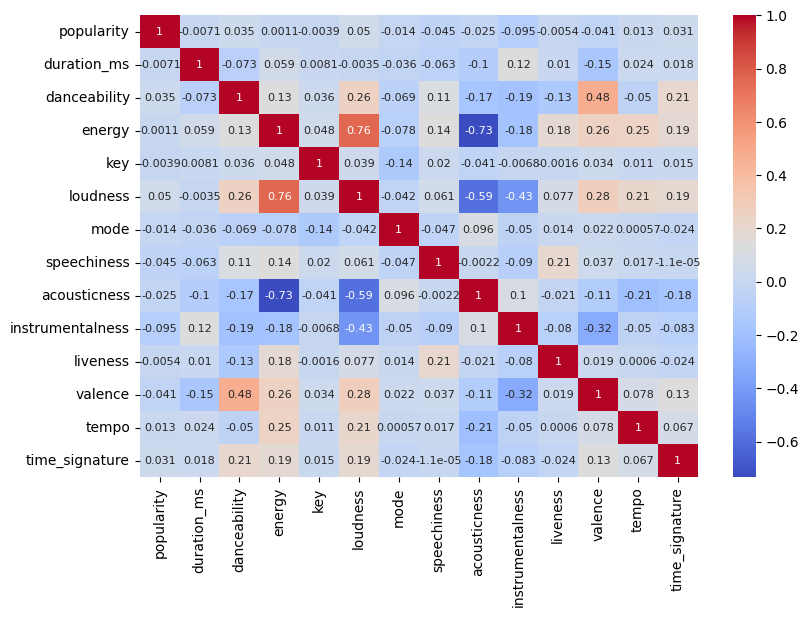

In [508]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',annot_kws={"size": 8})
plt.show()

#### Check duplicates

In [509]:
duplicate_count = df.duplicated(subset='track_id', keep='first').sum()

print("Number of duplicate entries based on track id:", duplicate_count)

Number of duplicate entries based on track id: 24259


In [510]:
duplicate_mask = df.duplicated(subset='track_id', keep='first')
duplicates = df[duplicate_mask]
df = df.drop_duplicates(subset='track_id', keep='first')
print("Dropped {} duplicate entries.".format(len(duplicates)))

Dropped 24259 duplicate entries.


### Feature preprocessing

In [511]:
print(df.columns)

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')


In [512]:
df.drop(['artists', 'track_name','track_id','album_name','explicit'], axis=1, inplace=True)

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89741 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        89741 non-null  int64  
 1   duration_ms       89741 non-null  int64  
 2   danceability      89741 non-null  float64
 3   energy            89741 non-null  float64
 4   key               89741 non-null  int64  
 5   loudness          89741 non-null  float64
 6   mode              89741 non-null  int64  
 7   speechiness       89741 non-null  float64
 8   acousticness      89741 non-null  float64
 9   instrumentalness  89741 non-null  float64
 10  liveness          89741 non-null  float64
 11  valence           89741 non-null  float64
 12  tempo             89741 non-null  float64
 13  time_signature    89741 non-null  int64  
 14  track_genre       89741 non-null  object 
dtypes: float64(9), int64(5), object(1)
memory usage: 11.0+ MB


#### Transform skewed data

In [514]:
skewness = df.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)
positive_skewed_features = skewness[skewness > 2]  
print(positive_skewed_features)

duration_ms    11.072075
speechiness     4.545863
liveness        2.062106
dtype: float64


In [515]:
for feature in positive_skewed_features.index:
    df[feature] = np.log1p(df[feature])

In [516]:
negative_skewed_features = skewness[skewness < -2]  
print(negative_skewed_features)

time_signature   -3.998837
dtype: float64


In [517]:
for feature in positive_skewed_features.index:
    df[feature] = np.log1p(df[feature].max() - df[feature])

In [518]:
skewness = df.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)
print(skewness)

instrumentalness    1.564014
acousticness        0.655741
tempo               0.182728
valence             0.127614
popularity          0.070868
key                -0.000157
danceability       -0.398282
energy             -0.559989
mode               -0.569665
duration_ms        -0.639883
loudness           -1.959883
liveness           -1.969206
time_signature     -3.998837
speechiness        -4.298881
dtype: float64


#### Standardization

In [519]:
numeric_cols = df.select_dtypes(include='number').columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,1.933926,-0.168327,0.644260,-0.675976,-1.203286,0.335731,-1.324600,-0.528322,-0.875177,-0.535478,-0.757350,0.934036,-1.133609,0.226215,acoustic
1,1.059320,0.875129,-0.804604,-1.825609,-1.203286,-1.673094,0.754945,0.089316,1.760797,-0.535464,0.605141,-0.770280,-1.479854,0.226215,acoustic
2,1.156499,0.057180,-0.702731,-1.073476,-1.484194,-0.236523,0.754945,0.282914,-0.349638,-0.535481,0.517344,-1.329508,-1.518271,0.226215,acoustic
3,1.836747,0.163540,-1.676186,-2.240257,-1.484194,-1.918236,0.754945,0.466561,1.704637,-0.535263,0.435454,-1.242010,1.981637,-1.979187,acoustic
4,2.371228,0.201211,0.316001,-0.746123,-0.922377,-0.226373,0.754945,0.312172,0.415912,-0.535481,0.705039,-1.150708,-0.070037,0.226215,acoustic


#### Encoding non numerical features (genre)

In [520]:
for col in df.columns:
    if df[col].dtype == 'object':
        frequency_map = df[col].value_counts(normalize=True)
        df[col+'_encoded'] = df[col].map(frequency_map)

In [521]:
df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded
0,1.933926,-0.168327,0.644260,-0.675976,-1.203286,0.335731,-1.324600,-0.528322,-0.875177,-0.535478,-0.757350,0.934036,-1.133609,0.226215,acoustic,0.011143
1,1.059320,0.875129,-0.804604,-1.825609,-1.203286,-1.673094,0.754945,0.089316,1.760797,-0.535464,0.605141,-0.770280,-1.479854,0.226215,acoustic,0.011143
2,1.156499,0.057180,-0.702731,-1.073476,-1.484194,-0.236523,0.754945,0.282914,-0.349638,-0.535481,0.517344,-1.329508,-1.518271,0.226215,acoustic,0.011143
3,1.836747,0.163540,-1.676186,-2.240257,-1.484194,-1.918236,0.754945,0.466561,1.704637,-0.535263,0.435454,-1.242010,1.981637,-1.979187,acoustic,0.011143
4,2.371228,0.201211,0.316001,-0.746123,-0.922377,-0.226373,0.754945,0.312172,0.415912,-0.535481,0.705039,-1.150708,-0.070037,0.226215,acoustic,0.011143


In [522]:
object_cols = df.select_dtypes(include='object').columns
df = df.drop(object_cols, axis=1)

df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_encoded
0,1.933926,-0.168327,0.644260,-0.675976,-1.203286,0.335731,-1.324600,-0.528322,-0.875177,-0.535478,-0.757350,0.934036,-1.133609,0.226215,0.011143
1,1.059320,0.875129,-0.804604,-1.825609,-1.203286,-1.673094,0.754945,0.089316,1.760797,-0.535464,0.605141,-0.770280,-1.479854,0.226215,0.011143
2,1.156499,0.057180,-0.702731,-1.073476,-1.484194,-0.236523,0.754945,0.282914,-0.349638,-0.535481,0.517344,-1.329508,-1.518271,0.226215,0.011143
3,1.836747,0.163540,-1.676186,-2.240257,-1.484194,-1.918236,0.754945,0.466561,1.704637,-0.535263,0.435454,-1.242010,1.981637,-1.979187,0.011143
4,2.371228,0.201211,0.316001,-0.746123,-0.922377,-0.226373,0.754945,0.312172,0.415912,-0.535481,0.705039,-1.150708,-0.070037,0.226215,0.011143


### Clustering without PCA

In [523]:
subsample_size = int(0.1 * len(df))

subsample_df = df.sample(n=subsample_size, random_state=42)

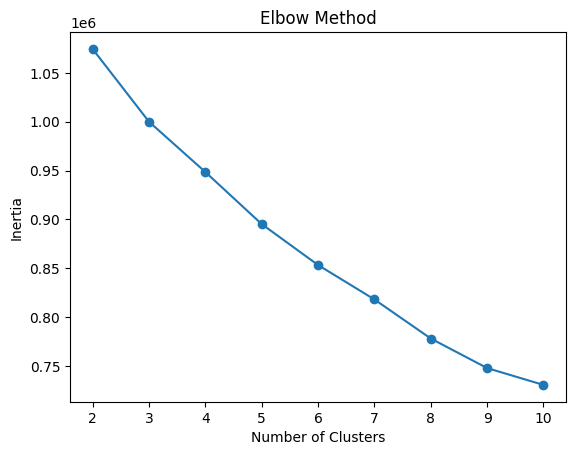

In [524]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [525]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

kmeans.fit(df)
cluster_labels = kmeans.labels_

In [526]:
calinski_harabasz_index = calinski_harabasz_score(df, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz_index)

Calinski-Harabasz Index: 11498.438693200776


In [527]:
davies_bouldin_score_val = davies_bouldin_score(df, cluster_labels)
print("Davies Bouldin Index:", davies_bouldin_score_val)

Davies Bouldin Index: 2.548924921495344


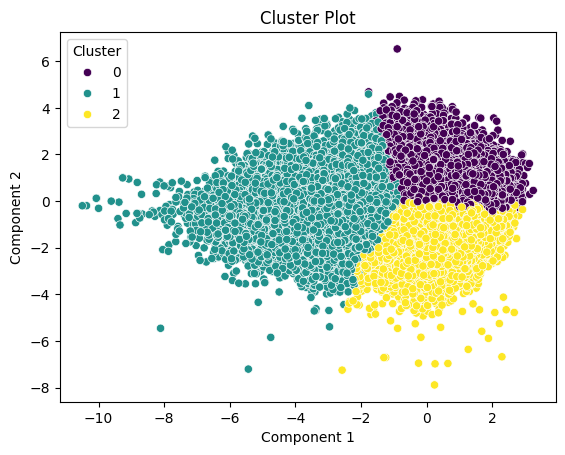

In [528]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(df)
df = pd.DataFrame(X_2d, columns=['Component 1', 'Component 2'])
df['Cluster'] = cluster_labels
sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='Cluster', palette='viridis')
plt.title('Cluster Plot')
plt.show()

### Clustering with PCA

#### PCA

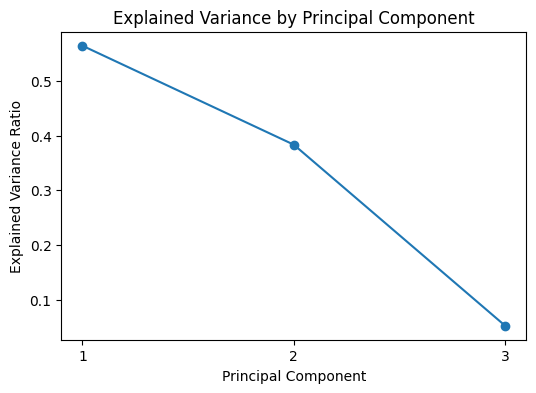

In [529]:
pca = PCA(n_components=None) 
pca.fit(df)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

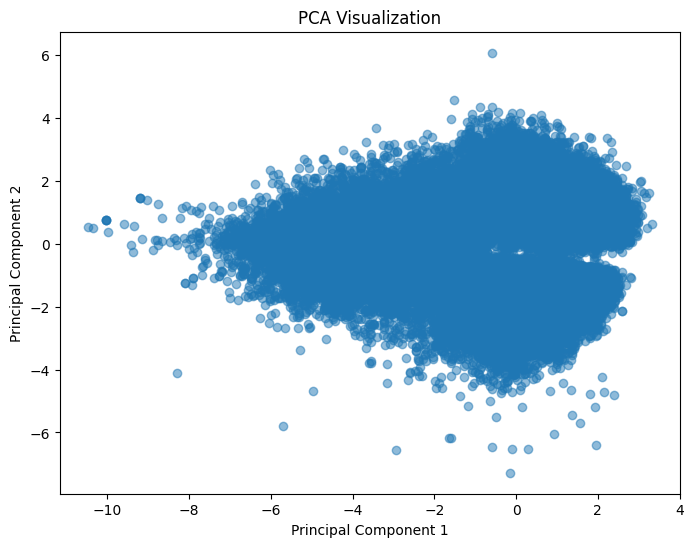

In [530]:
pca = PCA(n_components=2)
pca.fit(df)
df_pca = pca.transform(df)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Selecting optimal k

##### 1. Elbow Method (SSE / Inertia)

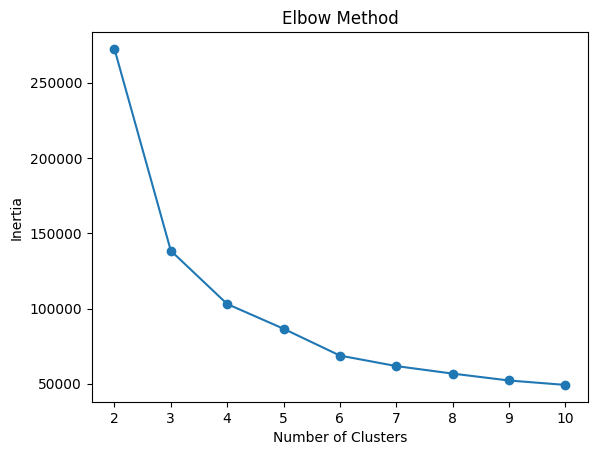

In [531]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

##### 2. Silhouette Score

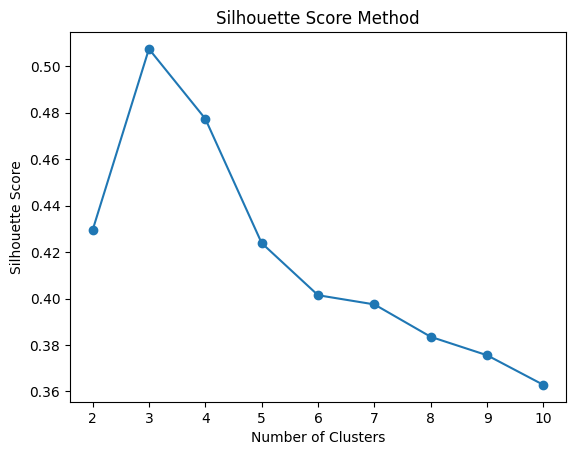

In [532]:

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df_pca)
    
    sample_idx = np.random.choice(len(df_pca), size=min(10000, len(df_pca)), replace=False)
    score = silhouette_score(df_pca[sample_idx], labels[sample_idx])
    
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### K-Means Clustering (K=3)

In [533]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_pca)
cluster_labels = kmeans.labels_

#### Evaluation

In [534]:
calinski_harabasz_index = calinski_harabasz_score(df_pca, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz_index)

Calinski-Harabasz Index: 101921.18625871484


In [535]:
davies_bouldin_score_value = davies_bouldin_score(df_pca, cluster_labels)
print("Davies Bouldin Index:", davies_bouldin_score_value)

Davies Bouldin Index: 0.683458209660064


#### Visualization

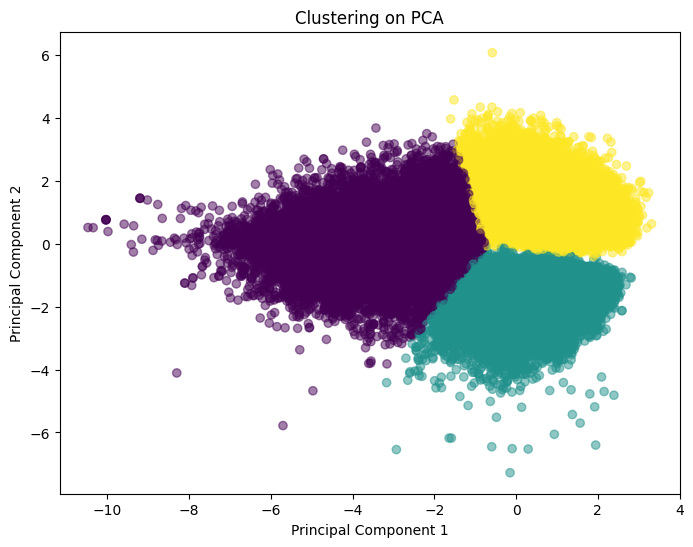

In [536]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Recommendation System

In [537]:
df=pd.read_csv("../data/spotify_dataset.csv")

In [538]:
df = df.drop_duplicates(subset='track_id', keep='first')

In [539]:
df["Cluster"] = cluster_labels

In [540]:
def recommend_songs(song_name, df, df_pca, top_n=15):
    
    if song_name not in df['track_name'].values:
        return f"Song '{song_name}' not found in dataset."
    
    idx = df[df['track_name'] == song_name].index[0]
    song_cluster = df.loc[idx, 'Cluster']
    cluster_indices = df[df['Cluster'] == song_cluster].index.to_numpy()
    cluster_indices = cluster_indices[cluster_indices < df_pca.shape[0]]
    cluster_features = df_pca[cluster_indices]
    sim_scores = cosine_similarity([df_pca[idx]], cluster_features)[0]
    top_indices = np.argsort(sim_scores)[::-1]
    recommended_indices = cluster_indices[top_indices]
    recommended_indices = recommended_indices[recommended_indices != idx]  
    recommended_indices = recommended_indices[:top_n]

    return df.loc[recommended_indices, 'track_name'].tolist()


In [542]:
song_name = input("Enter the song name you want recommendations for: ")
recommendations = recommend_songs(song_name, df, df_pca, top_n=15)

print(f"\nSimilar vibe songs to {song_name}:")
print("-----------------")
if isinstance(recommendations, str):
    print(recommendations)
else:
    for item in recommendations:
        print(item)



Similar vibe songs to Lover:
-----------------
Avichhu Vatcha
Goldilocks & The Three Bears - Instrumental
Quiero Volver
Chammak Challo
Are You Ready For Love? - Remastered
Quiero Vivir a Tu Lado
Sive
Jai appris à nager!
夏だぜジョニー
Me Siento
Merry Christmas, Kiss My Ass
Enemigos
Una Rata Vieja
Musikfest
Wings
